# Assignment 4
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# Digit learning challenge
- Use the methods taught in the course, or a good combination of the methods taught in the course to predict all 10 digits of the zipcode data. Only use ziptrain.csv data to build your model, and evaluate the accuracy of your model on ziptest.csv 

- Your codes must be reproducible. We may run your codes on ziptrain.csv data on our own machine. 

# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded


# Import Libraries/Modules/Objects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import time
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Get Data

In [3]:
ziptrain = np.loadtxt(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 4\ziptrain.csv")
ziptest = np.loadtxt(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 4\ziptest.csv")

In [4]:
X_train, X_test = ziptrain[:, 1:], ziptest[:, 1:]
y_train, y_test = ziptrain[:, 0], ziptest[:, 0]

In [5]:
y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_test = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Review Import

[0 0 0 0 0 0 1 0 0 0]


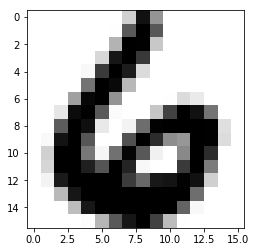

In [6]:
print(y_train[0])
plt.imshow(-X_train[0].reshape(16,16), 'gray')

# Define Helper Functions

In [7]:
def optimize_num_pc(model, X_train, y_train, X_test, y_test):
    
    num_feats = len(X_train[0, :])
    prec = []
    for m in range(2, num_feats):
        if m%50==0:
            print(m,'/',num_feats)
        pca = PCA(n_components=m)
        pca.fit(X_train)
        Z_train = pca.transform(X_train)
        Z_test = pca.transform(X_test)
        model.fit(X=Z_train, y=y_train)
        y_pred = model.predict(Z_test)
        prec.append([int(m), accuracy_score(y_test, y_pred)])
    
    prec = np.array(prec)
    m_maximizer = int(prec[prec[:, 1]==np.max(prec[:, 1])][0][0])
        
    return m_maximizer

# Start Gridsearch

In [8]:
Grid = namedtuple("Grid", ['model', 'param_grid'])

In [9]:
grids = [
    Grid(BaggingClassifier,
        {'estimator__n_estimators': [200, 400, 600, 800, 1000],
        'estimator__max_samples': [800, 1000, 1200, 1400]}),
    Grid(RandomForestClassifier,
        {'estimator__max_depth': [70, 80, 90, 100, None],
         'estimator__max_features': ['auto', 'sqrt'],
         'estimator__n_estimators': [200, 400, 600, 800, 1000]}),
    Grid(GradientBoostingClassifier,
         {'estimator__max_depth':[3, 4, 5, 6], 
          'estimator__n_estimators':[100,250,500,750,1000]}),
    Grid(SVC, 
    {"estimator__C": [4, 8, 10, 12], 
     "estimator__degree":[3, 4, 5, 6]})
]

In [10]:
#prec = optimize_num_pc(LinearDiscriminantAnalysis(), X_train, y_train, X_test, y_test)

### Fit with 30 CV folds so the mean score is statistically significant

In [11]:
def perform_gridsearch(grid):

    print("Starting grid {}".format(str(grid)))
    model = OneVsRestClassifier(grid.model())
    gs = GridSearchCV(model, param_grid=grid.param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    res = {"Model" : grid.model, "Best Parameters" : gs.best_params_, "Accuracy" : gs.best_score_}
    print("\n")
    print("Results from grid:")
    print(res)
    print("\n")

In [12]:
for grid in grids:
    perform_gridsearch(grid)
print("All Processes Completed Successfully.")

Starting grid Grid(model=<class 'sklearn.ensemble.bagging.BaggingClassifier'>, param_grid={'estimator__n_estimators': [200, 400, 600, 800, 1000], 'estimator__max_samples': [800, 1000, 1200, 1400]})
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 82.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 156.7min finished




Results from grid:
{'Model': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'Best Parameters': {'estimator__max_samples': 1400, 'estimator__n_estimators': 1000}, 'Accuracy': 0.8210122068303388}


Starting grid Grid(model=<class 'sklearn.ensemble.forest.RandomForestClassifier'>, param_grid={'estimator__max_depth': [70, 80, 90, 100, None], 'estimator__max_features': ['auto', 'sqrt'], 'estimator__n_estimators': [200, 400, 600, 800, 1000]})
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 53.4min finished




Results from grid:
{'Model': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'Best Parameters': {'estimator__max_depth': 100, 'estimator__max_features': 'auto', 'estimator__n_estimators': 400}, 'Accuracy': 0.8773830750240021}


Starting grid Grid(model=<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, param_grid={'estimator__max_depth': [3, 4, 5, 6], 'estimator__n_estimators': [100, 250, 500, 750, 1000]})
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 64.6min finished




Results from grid:
{'Model': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Best Parameters': {'estimator__max_depth': 3, 'estimator__n_estimators': 1000}, 'Accuracy': 0.9215471128788918}


Starting grid Grid(model=<class 'sklearn.svm.classes.SVC'>, param_grid={'estimator__C': [4, 8, 10, 12], 'estimator__degree': [3, 4, 5, 6]})
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.1min finished




Results from grid:
{'Model': <class 'sklearn.svm.classes.SVC'>, 'Best Parameters': {'estimator__C': 12, 'estimator__degree': 3}, 'Accuracy': 0.9518584556302291}


All Processes Completed Successfully.


In [ ]:
models =[
    BaggingClassifier(**),
    RandomForestClassifier,
    GradientBoostingClassifier,
    SVC
]